<a href="https://colab.research.google.com/github/astrovishalthakur/MachineLearning/blob/main/NaturalLanguageProcessing/Spacy/IntroductionToSpacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install spacy

### Donwloading three small english models.

In [2]:
! python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 15.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [3]:
import spacy

In [4]:
nlp = spacy.load("en_core_web_sm")

<img src="http://spacy.pythonhumanities.com/_images/spacy_containers.png" height=300 width=300/>

In [5]:
# reading data
url = "https://raw.githubusercontent.com/astrovishalthakur/freecodecamp_spacy/main/data/wiki_us.txt"

In [6]:
from urllib.request import urlopen

In [7]:
 # the lib that handles the url stuff
data = urlopen(url)

In [8]:
text = data.read()

In [9]:
type(text)

bytes

In [10]:
type(text.decode("utf-8"))

str

In [11]:
# text = str(text) 
# this doesn't work. Since it can't specify decoding.
text = text.decode("utf-8")

In [12]:
text

"The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.\n\nPaleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies 

In [13]:
# creating a doc container
doc = nlp(text)

In [14]:
print(doc)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America. It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j] At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d] The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22] With a population of more than 331 million people, it is the third most populous country in the world. The national capital is Washington, D.C., and the most populous city is New York.

Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century. The United States emerged from the thirteen British colonies est

In [15]:
print(len(doc))
print(len(text))

654
3521


In [16]:
# Hmm… What’s going on here?
# Same text, but different length. 
# Why does this occur? 
# To answer that, let’s explore it more deeply 
# and try and print off each item in each object.

In [17]:
for token in text[:10]:
  print(token)

T
h
e
 
U
n
i
t
e
d


In [18]:
# As we would expect. We have printed off each character, including white spaces.
#  Let’s try and do the same with the Doc container.

In [19]:
for token in doc[:10]:
  print(token)

The
United
States
of
America
(
U.S.A.
or
USA
)


##### And now we see the magical difference. While on the surface it may seem that the Doc container’s length is dependent on the quantity of words, look more closely. You should notice that the open and close parentheses are also considered an item in the container. These are all known as tokens. Tokens are a fundamental building block of spaCy or any NLP framework.

##### They can be words or punctuation marks. Tokens are something that has syntactic purpose in a sentence and is self-contained. A good example of this is the contraction “don’t” in English. When tokenized, or the process of converting the text into tokens, we will have two tokens. “do” and “n’t” because the contraction represents two words, “do” and “not”.

##### On the surface, this may not seem exceptional. But it is. You may be thinking to yourself that you could easily use the split method in Python to split by whitespace and have the same result. But you’d be wrong. Let’s see why.

In [20]:
for token in text.split()[:10]:
  print(token)

The
United
States
of
America
(U.S.A.
or
USA),
commonly
known


notice that the parentheses are not removed or handled indvidually.

In [21]:
# to get deeper understanding.
words = text.split()[:10]

i = 5
for token in doc[i:8]:
  print(f"SpaCy Token {i}:\n{token}\nWord Split{i}:\n{words[i]}\n\n")
  i += 1

SpaCy Token 5:
(
Word Split5:
(U.S.A.


SpaCy Token 6:
U.S.A.
Word Split6:
or


SpaCy Token 7:
or
Word Split7:
USA),




We can see clearly now how the spaCy Doc container does much more with its tokenization than a simple split method. We could, surely, write complex rules for a language to achieve the same results, but why bother? SpaCy does it exceptionally well for all languages.

# Sentence Boundary Detection (SBD)

In [22]:
for sent in doc.sents:
  print(sent)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.
It consists of 50 states, a federal district, five major unincorporated territories, 326 Indian reservations, and some minor possessions.[j]
At 3.8 million square miles (9.8 million square kilometers), it is the world's third- or fourth-largest country by total area.[d]
The United States shares significant land borders with Canada to the north and Mexico to the south, as well as limited maritime borders with the Bahamas, Cuba, and Russia.[22]
With a population of more than 331 million people, it is the third most populous country in the world.
The national capital is Washington, D.C., and the most populous city is New York.


Paleo-Indians migrated from Siberia to the North American mainland at least 12,000 years ago, and European colonization began in the 16th century.
The United States emerged from the thirteen British colonies es

In [23]:
sentence1 = doc.sents[0]
print(sentence1)

TypeError: ignored

Uh oh! We got an error. That is because the sents attribute is a generator. In python, we can usually iterate over generators by converting them into a list. So, let’s do that.

In [24]:
sentence1 = list(doc.sents)[0]
print (sentence1)

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.


# Token Attributes

The token object contains a lot of different attributes that are VITAL do performing NLP in spaCy. We will be working with a few of them, such as:

.text

.head

.left_edge

.right_edge

.ent_type_

.iob_

.lemma_

.morph

.pos_

.dep_

.lang_

I will briefly describe these here and show you how to grab each one and what they look like. We will be exploring each of these attributes more deeply in this chapter and future chapters. To demonstrate each of these attributes, we will use one token, “States” which is part of a sequence of tokens that make up “The United States of America”

In [25]:
token2 = sentence1[2]
print(token2)

States


In [26]:
# Verbatim text content
token2.text

'States'

In [27]:
# syntactic parent
token2.head

is

This tells to which word it is governed by, in this case, the primary verb, “is”, as it is part of the noun subject.

In [28]:
# Left edge
# leftmost token og thes token;s syntactic descendants
token2.left_edge

The

If part of a sequence of tokens that are collectively meaningful, known as multi-word tokens, this will tell us where the multi-word token begins.

In [29]:
# Right Edge: rightmost token of this token's syntactic descendants
token2.right_edge

,

This will tell us where multiword token ends

In [30]:
# Entity Type
token2.ent_type

384

Note the absence of the _ at the end of the attribute. This will return an integer that corresponds to an entity type, where as _ will give you the string equivalent., as in below.

In [31]:
token2.ent_type_

'GPE'

We will learn all about types of entities in our chapter on named entity recognition, or NER. For now, simply understand that GPE is geopolitical entity and is correct.

# Ent IOB
##### IOB code of named entity tag. “B” means the token begins an entity, “I” means it is inside an entity, “O” means it is outside an entity, and "" means no entity tag is set.



In [32]:
token2.ent_iob_

'I'

IOB is a method of annotating a text. In this case, we see “I” because states is inside an entity, that is to say that it is part of the United States of America.

# Lemma
##### Base form of the token, with no inflectional suffixes

In [33]:
token2.lemma_

'States'

In [34]:
sentence1[12].lemma_

'know'

In [35]:
sentence1[12]

known

# Morph
##### Morphological analysis

In [36]:
type(token2)

spacy.tokens.token.Token

In [37]:
type(sentence1[12])

spacy.tokens.token.Token

In [38]:
sentence1

The United States of America (U.S.A. or USA), commonly known as the United States (U.S. or US) or America, is a country primarily located in North America.

In [39]:
list(sentence1[12].morph)

['Aspect_perf', 'VerbForm_part']

In [40]:
for i in sentence1:
  print(list(i.morph))

[]
['Number_sing', 'NounType_prop']
['Number_sing', 'NounType_prop']
[]
['Number_sing', 'NounType_prop']
['PunctType_brck']
['Number_sing', 'NounType_prop']
['ConjType_comp']
['Number_sing', 'NounType_prop']
['PunctType_brck']
['PunctType_comm']
['Degree_pos']
['Aspect_perf', 'VerbForm_part']
[]
[]
['Number_sing', 'NounType_prop']
['Number_sing', 'NounType_prop']
['PunctType_brck']
['Number_sing', 'NounType_prop']
['ConjType_comp']
['Number_sing', 'NounType_prop']
['PunctType_brck']
['ConjType_comp']
['Number_sing', 'NounType_prop']
['PunctType_comm']
['Number_sing', 'Person_three', 'VerbForm_fin']
[]
['Number_sing']
['Degree_pos']
['Aspect_perf', 'VerbForm_part']
[]
['Number_sing', 'NounType_prop']
['Number_sing', 'NounType_prop']
['PunctType_peri']


# Part of Speech

In [41]:
token2.pos_

'PROPN'

In [42]:
list(token2.morph)

['Number_sing', 'NounType_prop']

# Syntactic Dependency

In [43]:
token2.dep_ 

'nsubj'

dep_ means what roles it plays in sentence<br>
"nsubj" means noun subject.

In [44]:
# Lang.
token2.lang_

'en'

# Part of speech Tagging(POS)

Part-of-speech (POS) tagging is a popular Natural Language Processing process which refers to categorizing words in a text (corpus) in correspondence with a particular part of speech, depending on the definition of the word and its context.

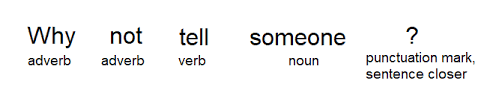

In [45]:
for token in sentence1:
    print (token.text, token.pos_, token.dep_)

The DET det
United PROPN compound
States PROPN nsubj
of ADP prep
America PROPN pobj
( PUNCT punct
U.S.A. PROPN appos
or CCONJ cc
USA PROPN conj
) PUNCT punct
, PUNCT punct
commonly ADV advmod
known VERB acl
as SCONJ prep
the DET det
United PROPN compound
States PROPN pobj
( PUNCT punct
U.S. PROPN appos
or CCONJ cc
US PROPN conj
) PUNCT punct
or CCONJ cc
America PROPN conj
, PUNCT punct
is AUX ROOT
a DET det
country NOUN attr
primarily ADV advmod
located VERB acl
in ADP prep
North PROPN compound
America PROPN pobj
. PUNCT punct


 PROPN is proper noun, AUX is an auxiliary verb, ADJ, is adjective, etc. We can visualize this sentence with a diagram through spaCy’s displaCy Notebook feature.

In [47]:
from spacy import displacy
displacy.render(sentence1, style="dep", jupyter=True)

# Named Entity Recognition

Another essential task of NLP, is named entity recognition, or NER. I spoke about NER in the last notebook. Here, I’d like to demonstrate how to perform basic NER via spaCy. Again, we will iterate over the doc object as we did above, but instead of iterating over doc.sents, we will iterate over doc.ents. For our purposes right now, I simply want to print off each entity’s text (the string itself) and its corresponding label (note the _ after label).

Named Entity Recognition is one of the key entity detection methods in NLP. 2. Named entity recognition is a natural language processing technique that can automatically scan entire articles and pull out some fundamental entities in a text and classify them into predefined categories.

In [48]:
for ent in doc.ents:
    print (ent.text, ent.label_)

The United States of America GPE
U.S.A. GPE
USA GPE
the United States GPE
U.S. GPE
US GPE
America GPE
North America LOC
50 CARDINAL
five CARDINAL
326 CARDINAL
Indian NORP
3.8 million square miles QUANTITY
9.8 million square kilometers QUANTITY
fourth ORDINAL
The United States GPE
Canada GPE
Mexico GPE
Bahamas GPE
Cuba GPE
Russia.[22 CARDINAL
more than 331 million CARDINAL
third ORDINAL
Washington GPE
D.C. GPE
New York GPE
Paleo-Indians NORP
Siberia LOC
North American NORP
at least 12,000 years ago DATE
European NORP
the 16th century DATE
The United States GPE
thirteen CARDINAL
British NORP
the East Coast LOC
Great Britain GPE
the American Revolutionary War ORG
the late 18th century DATE
U.S. GPE
North America LOC
Native Americans NORP
1848 DATE
the United States GPE
United States GPE
the second half of the 19th century DATE
the American Civil War EVENT
Spanish NORP
American War EVENT
World War EVENT
U.S. GPE
World War II EVENT
the Cold War EVENT
the United States GPE
the Korean War EVE

Sometimes it can be difficult to read this output as raw data. In this case, we can again leverage spaCy’s displaCy feature. Notice that this time we are altering the keyword argument, style, with the string “ent”. This tells displaCy to display the text as NER annotations

In [50]:
displacy.render(doc, style="ent", jupyter=True)

I recommend spending a little bit of time going through this notebook a few times. The information covered throughout this notebook will be reinforced as we explore each of these areas in more depth with real-world examples of how to implement them to tackle different problems.